<h2> MOwNiT lab1 - Arytmetyka komputerowa </h2>



IEEE-754 Analysis http://babbage.cs.qc.cuny.edu/IEEE-754/

In [1]:
bitstring(Float32(1.0))

"00111111100000000000000000000000"

In [3]:
bitstring(Float64(1.0))

"0011111111110000000000000000000000000000000000000000000000000000"

In [4]:
# domy�lnie Float64
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [4]:
# Float16
bitstring(Float16(1.0))

"0011110000000000"

In [5]:
# znak, cecha, mantysa
#uwaga - w Julii tablice indeksujemy od 1
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

('0', "01111111", "00000000000000000000000")

In [6]:
println(significand(Float32(1.0)), "*2^", exponent(Float32(1.0)))

1.0*2^0


In [11]:
# co ile liczby sa reprezentowane 
c=Float32[]
a=Float32(1.0)
r=1:10
for i=r
    push!(c, a)
    a=nextfloat(a)
end

#map(x-> bitstring(x),c)

10-element Array{Float32,1}:
 1.0      
 1.0000001
 1.0000002
 1.0000004
 1.0000005
 1.0000006
 1.0000007
 1.0000008
 1.000001 
 1.0000011

In [8]:
# Maszynowe epsilon m�wi, jaki jest odst�p mi�dzy kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
eps(Float32(1))

1.1920929f-7

In [9]:
eps(Float32)


1.1920929f-7

In [10]:
# Badanie postaci zdenormalizowanej. Co si� dzieje, jak liczby s� coraz mniejsze?
a=Float32(1.1)
for i=1:149
    a=a/Float32(2.0)
    println(decode(a), "  ", issubnormal(a))
end

('0', "01111110", "00011001100110011001101")  false
('0', "01111101", "00011001100110011001101")  false
('0', "01111100", "00011001100110011001101")  false
('0', "01111011", "00011001100110011001101")  false
('0', "01111010", "00011001100110011001101")  false
('0', "01111001", "00011001100110011001101")  false
('0', "01111000", "00011001100110011001101")  false
('0', "01110111", "00011001100110011001101")  false
('0', "01110110", "00011001100110011001101")  false
('0', "01110101", "00011001100110011001101")  false
('0', "01110100", "00011001100110011001101")  false
('0', "01110011", "00011001100110011001101")  false
('0', "01110010", "00011001100110011001101")  false
('0', "01110001", "00011001100110011001101")  false
('0', "01110000", "00011001100110011001101")  false
('0', "01101111", "00011001100110011001101")  false
('0', "01101110", "00011001100110011001101")  false
('0', "01101101", "00011001100110011001101")  false
('0', "01101100", "00011001100110011001101")  false
('0', "01101

In [8]:
#Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

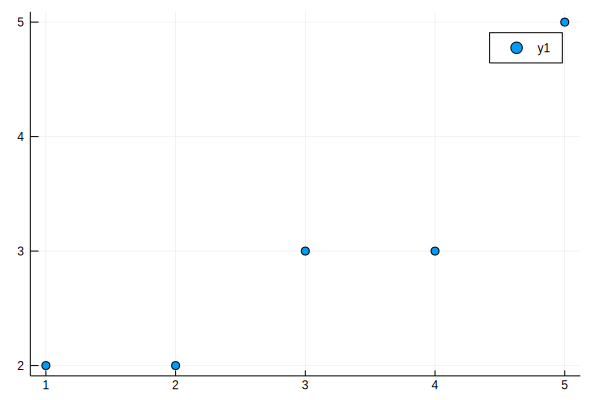

In [9]:
scatter(1:1:5, [2,2,3,3,5])

In [4]:
bitstring(Float32(1.0/3.0))

"00111110101010101010101010101011"

In [5]:
bitstring(Float64(1.0/3.0))

"0011111111010101010101010101010101010101010101010101010101010101"

In [6]:
bitstring(Float64(Float32(1.0/3.0)))

"0011111111010101010101010101010101100000000000000000000000000000"

In [26]:
d=Float64[]
a=Float64(1.0)
r=1:1000
for i=r
    push!(d, eps(a))
    a=a+1.0
end


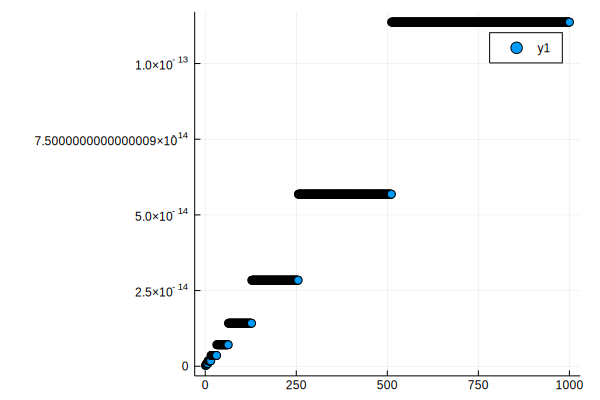

In [27]:
scatter(1:1:1000, d)

In [8]:
function silnia(x)
    wynik = 1
    for i =1:x
        wynik*=i
    end
    return wynik
end

silnia (generic function with 1 method)

In [1]:
function f(x,n)
    wynik = 1
    for i = 1:n
        wynik+=((x^i)/(factorial(i)))
        println(wynik)
    end
    return wynik
end

f (generic function with 1 method)

In [14]:
silnia(22)

-1250660718674968576

In [37]:
f(-5.5,20)

-4.5
10.625
-17.104166666666668
21.023437499999996
-20.916927083333338
17.52840711805555
-12.678641183035719
8.08870452396453
-4.602451185868954
2.3776844545394624
-1.112383365664746
0.48723105192884963
-0.18952889397613304
0.07634108477225304
-0.021144574102155186
0.012366121135922642
0.0015244256177209918
0.0048371659149492735
0.0038782147762779287
0.004141926339412548


0.004141926339412548

In [71]:
exp(-5.5)

0.004086771438464067

In [40]:
function niestabilna(n)
    if n == 0 return 1
    end
    if n == 1 return 2
    end
    return (2/3*niestabilna(n-1)+1/3*niestabilna(n-2))
end

niestabilna (generic function with 1 method)

In [41]:
function stabilna(n)
    return 7/4-(3/4)*(-1/3)^n
end

stabilna (generic function with 1 method)

In [42]:
function porownanie()
    for i = 0:10
        println(abs(niestabilna(i)-stabilna(i)))
    end
end

porownanie (generic function with 1 method)

In [43]:
porownanie()

0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
6.661338147750939e-16
6.661338147750939e-16
8.881784197001252e-16
8.881784197001252e-16


<b> Zadanie 1 </b>  Por�wna� w j�zyku Julia reprezentacj� bitow� liczby 1/3 dla Float32, Float64 oraz liczby, 
kt�ra jest inicjalizowana jako Float32, a potem rzutowana na Float64.

<b>Zadanie 2</b> Zbada�, jak zmienia si� odleg�o�� mi�dzy kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomoc� j�zyka Julia. 
Narysowa� wykres u�ywaj�c Plots zale�no�ci odleg�o�ci od warto�ci liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

<b>Zadanie 3</b> Jedn� z bibliotek numerycznych, jak� b�dziemy u�ywa� na zaj�ciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (j�zyk C). Korzystaj�c ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wy�wietlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczy� jak zmienia si� cecha i mantysa dla coraz mniejszych liczb. Zaobserwowa�, kiedy matysa przestaje by� znormalizowana i dlaczego?

<b>Zadanie 4</b> Wymy�li� w�asny przyk�ad algorytmu niestablinego numerycznie. 
1. Zademostrowa� wersj� niestabiln�, pokaza�, �e dzia�a �le.
2. Wyja�ni�, dlaczego dzia�a �le.
3. Zademonstowa� wersj� stabiln�.
4. J�zyk dowolny.